In [1]:
import tensorflow as tf
import numpy as np

In [2]:
width = 224
height = 224
#height and width are (224,224) since we will use the mobileNetv2 network
batch_size = 32
data_dir = r"C:/Users/Sony/Desktop/LU/aimlmask/dataset"

In [3]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [4]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [5]:
classes = training.class_names
classes

['with_mask', 'without_mask']

In [6]:
training

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

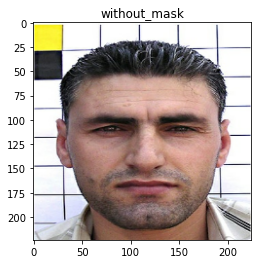

In [7]:
import matplotlib.pyplot as plt
for images, labels in training.take(1):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

In [8]:
from tensorflow.keras.applications import MobileNetV2

In [9]:
model = MobileNetV2(weights='imagenet')

14540800/14536120 [==============================] - 2s 0us/step


In [10]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
face_mask_detection = model.fit(training,validation_data=validation,epochs=3)

Epoch 1/3
81/81 [==============================] - 1703s 21s/step - loss: 0.8205 - accuracy: 0.8802 - val_loss: 28.6594 - val_accuracy: 0.4806
Epoch 2/3
81/81 [==============================] - 1667s 20s/step - loss: 0.0575 - accuracy: 0.9852 - val_loss: 1.8317 - val_accuracy: 0.8717
Epoch 3/3
55/81 [===================>..........] - ETA: 8:24 - loss: 0.0447 - accuracy: 0.9917

In [17]:
#load the image
img = tf.keras.preprocessing.image.load_img('C:/Users/Sony/Desktop/LU/aimlmask/dataset/image.png', target_size=(height, width))
#convert to array
image_array = tf.keras.preprocessing.image.img_to_array(img)
#expand dimensions to fit in the model
image_array = tf.expand_dims(image_array,0)
#check the shape of the image
image_array.shape

TensorShape([1, 224, 224, 3])

In [18]:
predictions = model.predict(image_array)
#using softmax to get the results
score = tf.nn.softmax(predictions[0])

In [ ]:
# import numpy
# print(classes[numpy.argmax(score)], 100*numpy.max(score))

In [ ]:
model.save('dummy.model', save_format="h5")

In [ ]:
acc = face_mask_detection.history['accuracy']
val_acc = face_mask_detection.history['val_accuracy']

loss= face_mask_detection.history['loss']
val_loss= face_mask_detection.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()